In [10]:
from MOT import MOT
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
params = {
        'd':1.2,
        'thred_s':0.3,
        'N':20,
        'delta_thred' : 1e-3,
        'step':0.1,
        'win_size':(5,13),
        'eps': 1.5,
        'min_samples':16
}
A = np.array( # x,y,l,w,h,,x',y',l',w',h',x'',y''
[[1,0,0,0,0,1,0,0,0,0,.5, 0],
    [0,1,0,0,0,0,1,0,0,0, 0,.5],
    [0,0,1,0,0,0,0,1,0,0, 0, 0],
    [0,0,0,1,0,0,0,0,1,0, 0, 0],
    [0,0,0,0,1,0,0,0,0,1, 0, 0],
    [0,0,0,0,0,1,0,0,0,0, 1, 0],
    [0,0,0,0,0,0,1,0,0,0, 0, 1],
    [0,0,0,0,0,0,0,1,0,0, 0, 0],
    [0,0,0,0,0,0,0,0,1,0, 0, 0],
    [0,0,0,0,0,0,0,0,0,1, 0, 0],
    [0,0,0,0,0,0,0,0,0,0, 1, 0],
    [0,0,0,0,0,0,0,0,0,0, 0, 1]]
    )
Q = np.diag([1,1,1,1,1,1,1,1,1,1,1,1])*0.01
H = np.array([[1,0,0,0,0,0,0,0,0,0,0,0],
            [0,1,0,0,0,0,0,0,0,0,0,0],
            [0,0,1,0,0,0,0,0,0,0,0,0],
            [0,0,0,1,0,0,0,0,0,0,0,0],
            [0,0,0,0,1,0,0,0,0,0,0,0]])
R = np.diag([10,10,0.1,0.1,0.1])
P = np.diag([1,1,1,1,1,1,1,1,1,1,1,1])
missing_thred = 7
os.chdir(r'/Users/czhui960/Documents/Lidar/RawLidarData/FrameSamplingTest')
mot = MOT(r'./2020-7-27-10-30-0.pcap',ending_frame=17950,background_update_frame = 2000,**params)
mot.initialization()
mot.mot_tracking(missing_thred,A,P,H,Q,R)

  0%|          | 2/2000 [00:00<02:09, 15.38it/s]

Initialization...


100%|██████████| 2000/2000 [01:29<00:00, 22.29it/s]


Generating Threshold Map


Tracking 2000 frame:  11%|█         | 1999/17949 [03:55<36:23,  7.30it/s]

Generating Threshold Map


Tracking 4000 frame:  22%|██▏       | 3999/17949 [08:23<27:01,  8.60it/s]  

Generating Threshold Map


Tracking 6000 frame:  33%|███▎      | 5998/17949 [12:23<20:00,  9.95it/s]  

Generating Threshold Map


Tracking 8000 frame:  45%|████▍     | 7999/17949 [16:42<21:37,  7.67it/s]  

Generating Threshold Map


Tracking 10000 frame:  56%|█████▌    | 9999/17949 [21:02<19:26,  6.81it/s] 

Generating Threshold Map


Tracking 12000 frame:  67%|██████▋   | 11999/17949 [26:01<13:31,  7.33it/s]  

Generating Threshold Map


Tracking 14000 frame:  78%|███████▊  | 13999/17949 [30:20<08:05,  8.13it/s]  

Generating Threshold Map


Tracking 16000 frame:  89%|████████▉ | 15999/17949 [34:25<03:46,  8.60it/s]  

Generating Threshold Map


Tracking 17949 frame: 100%|██████████| 17949/17949 [37:55<00:00,  7.89it/s]


In [14]:
lengths = [len(mot.Off_tracking_pool[key].post_seq) for key in mot.Off_tracking_pool.keys()]
post_seqs = [mot.Off_tracking_pool[key].post_seq for key in mot.Off_tracking_pool.keys()]
# post_seqs = [np.array([p_ for p_ in p if type(p_) != int]) for p in post_seqs]
mea_seqs = [mot.Off_tracking_pool[key].mea_seq for key in mot.Off_tracking_pool.keys()]
# mea_seqs = [np.array([p_ for p_ in p if type(p_) != int]) for p in mea_seqs]
keys = [key for key in mot.Off_tracking_pool]

In [11]:
mea_seqs[0].reshape((mea_seqs[0].shape[0],mea_seqs[0].shape[1]))

array([[-11.88047381, -24.11983506,   5.74506133,   3.44162513,
          1.9988973 ],
       [-11.36845571, -24.19785975,   5.66470543,   3.20838818,
          1.98715172],
       [-11.02464894, -24.07667096,   5.49660765,   2.77391339,
          2.00251327],
       [-10.76936119, -24.31241028,   4.77818289,   2.91702679,
          1.99218615],
       [-10.47100548, -24.21472666,   4.44472988,   2.4224666 ,
          2.00041727],
       [-10.07275643, -24.29881799,   3.46991057,   2.30770189,
          1.96747611],
       [ -9.91118323, -24.461892  ,   3.33550198,   2.34045888,
          1.95886982],
       [ -9.63486142, -24.47257514,   2.60529964,   1.97369476,
          1.95963644],
       [ -9.32102584, -24.40522819,   1.9690796 ,   1.65434724,
          2.11437268],
       [ -8.99713312, -24.20497859,   1.51781835,   0.87194294,
          1.64758911],
       [ -8.56618912, -24.02991867,   0.46006345,   0.24498098,
          1.1887402 ]])

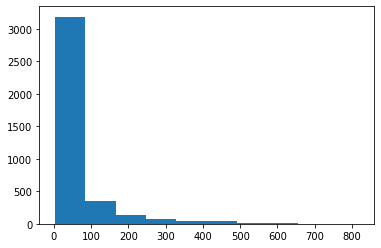

In [6]:
plt.hist(lengths,bins = 10)
plt.show()

In [5]:
key = 1712
plt.figure(figsize = (10,10))
plt.plot(post_seqs[key][:,0],post_seqs[key][:,1],marker = 'o',label = 'Post')
plt.plot(mea_seqs[key][:,0],mea_seqs[key][:,1],marker = 'x',label = 'Mea')
plt.show()

NameError: name 'post_seqs' is not defined

<Figure size 720x720 with 0 Axes>